In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from mimiciii_db import DB
from mimiciii_db.config import db_url

In [2]:
db = DB.from_url(db_url())
print("Database connected successfully!")

Database connected successfully!


In [3]:
query = """
SELECT * from mimiciii.varun_multimorbidity_by_age_bracket_1a
"""

# Use your database connection
df = db.query_df(query)
df

,age_bracket,n_in_bracket,n_multimorbid,pct_multimorbid,se_pct,sd_pct,sort_key
0,16-24,1168,380,32.534247,1.370852,46.850266,1
1,25-44,4507,2519,55.890836,0.739590,49.651768,2
2,45-64,12769,9495,74.359778,0.386413,43.664645,3
3,65-84,15747,13544,86.010034,0.276429,34.688290,4
4,≥85,2415,2182,90.351967,0.600800,29.524884,5


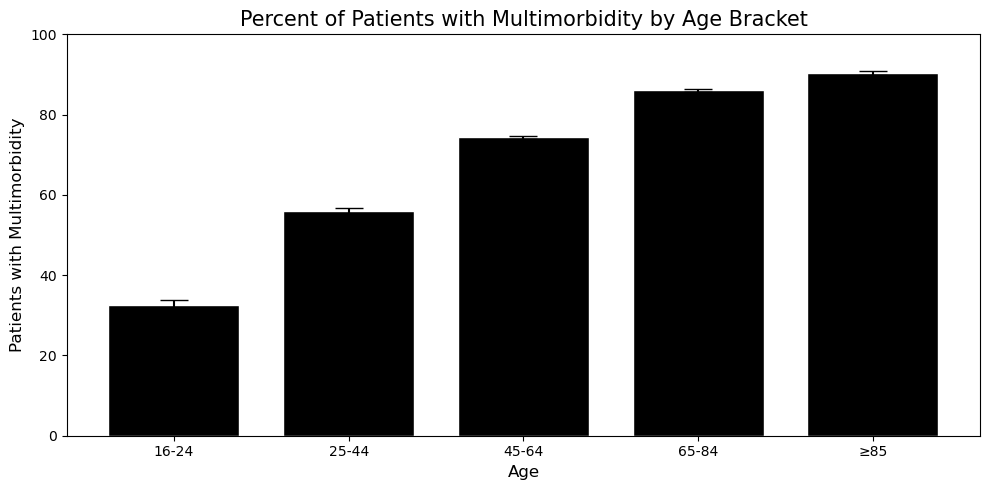

In [4]:
plt.figure(figsize=(10,5))

plt.bar(df['age_bracket'], df['pct_multimorbid'], yerr=df['se_pct'],
        capsize=10,
        width=0.75,
        color='black',
        edgecolor='white')

plt.ylim(0, 100)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Patients with Multimorbidity', fontsize=12)
plt.title('Percent of Patients with Multimorbidity by Age Bracket', fontsize=15)

plt.tight_layout()
plt.show();